In [1]:
#csv 불러오기
import pandas as pd
csv_te = pd.read_csv("csv_file_change.csv")
csv_te

,Unnamed: 0,id,file,label
0,0,0,1.wav,0
1,1,1,2.wav,0
2,2,2,3.wav,0
3,3,3,4.wav,0
4,4,4,5.wav,0
...,...,...,...,...
50100,50100,50100,50101.wav,1
50101,50101,50101,50102.wav,1
50102,50102,50102,50103.wav,1
50103,50103,50103,50104.wav,1


In [2]:
#필요 열만 취함
df = csv_te.drop(csv_te.columns[[0]], axis=1)
df

,id,file,label
0,0,1.wav,0
1,1,2.wav,0
2,2,3.wav,0
3,3,4.wav,0
4,4,5.wav,0
...,...,...,...
50100,50100,50101.wav,1
50101,50101,50102.wav,1
50102,50102,50103.wav,1
50103,50103,50104.wav,1


In [3]:
#섞어서 난수 생성
df_shuffled = df.sample(frac=1).reset_index(drop=True)

In [4]:
df_shuffled

,id,file,label
0,37852,37853.wav,0
1,28923,28924.wav,0
2,9330,9331.wav,0
3,21578,21579.wav,0
4,10426,10427.wav,0
...,...,...,...
50100,450,451.wav,0
50101,21351,21352.wav,0
50102,29497,29498.wav,0
50103,21833,21834.wav,0


In [5]:
print(df_shuffled[df_shuffled.file == '1.wav'])

       id   file  label
15975   0  1.wav      0


In [8]:
#data 들어있는 dataset 만들기, 
import librosa
from tqdm import tqdm
import os

import tensorflow as tf

#이건 gpu 실행 코드, cpu 환경은 삭제해도 좋음
os.environ["CUDA_VISIBLE_DEVICES"]="0"
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_memory_growth(gpus[0], True)
    except RuntimeError as e:
        print(e)

# 이게 train dataset 작성코드
def train_dataset(x):#나눌 크기인 x초 입력
    folder = "D:/wav_data/nomal/8-2/"
    dataset = []
    for file_name in tqdm(os.listdir(folder)):
        if 'wav' in file_name:
            abs_file_path = os.path.join(folder,file_name)
            data, sr = librosa.load(abs_file_path, sr = 16000)
            class_label = (df_shuffled[df_shuffled.file == file_name]['label']).values[0]
            #data를 x초로 나누어서 작성해야 함
            for i in range((len(data)//(sr*x))+1):
                dataset.append([data[int(sr*x)*i:int(sr*x)*(i+1)], class_label])
    print("Dataset 생성완료")
    return pd.DataFrame(dataset, columns=['data','label'])

#def anomal_dataset(x):#나눌 크기인 x초 입력
#    folder = "D:/wav_data/test/"
#    dataset = []
#    for file_name in tqdm(os.listdir(folder)):
#        if 'wav' in file_name:
#            abs_file_path = os.path.join(folder,file_name)
#            data, sr = librosa.load(abs_file_path, sr = 16000)
#            class_label = (df_shuffled[df_shuffled.file == file_name]['label']).values[0]
           #data를 x초로 나누어서 작성해야 함
#            for i in range((len(data)//(sr*x))+1):
#                dataset.append([data[int(sr*x)*i:int(sr*x)*(i+1)], class_label])
#    print("Dataset 생성완료")
#    return pd.DataFrame(dataset, columns=['data','label'])

train_wav = train_dataset(5)
#abnomal_wav = anomal_dataset(5)

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [02:43<00:00,  3.07it/s]

Dataset 생성완료


In [9]:
#train data 확인
print(train_wav.shape)
train_wav.head()

(26080, 2)


,data,label
0,"[-0.000485693, -0.0004249666, 0.000137761, 0.0...",0
1,"[0.0004977002, 0.00038266135, 0.00023456996, 0...",0
2,"[-0.0051381025, -0.004590434, -0.0041400194, -...",0
3,"[-0.002504876, 0.00011069182, 0.0022680846, 0....",0
4,"[-0.0021700626, -0.0013376633, -0.0018756392, ...",0


In [10]:
abnomal_wav.head()

,data,label
0,"[-0.00055966503, -0.0005657119, -0.0005393461,...",0
1,"[0.015930885, 0.01525387, 0.013981207, 0.01214...",0
2,"[0.00037218435, 0.00032808585, 0.0003594728, 0...",0
3,"[0.0032489628, 0.0020151078, 0.0005948128, -0....",0
4,"[0.000105859006, 0.00019747746, 0.0001368796, ...",0


In [11]:
#배열 확인
for i in range(len(train_wav)):
    print(len(train_wav['data'][i]))

80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
60392
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
14456
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
24994
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
8000

80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
26166
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
8396
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000

80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
66514
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
31410
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
49244
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
8000

80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
61382
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
73662
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
24416
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
6147

80000
1410
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
52850
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
16556
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000

80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
78116
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
28530
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
35712
80000
80000
80000
80000
80000
80000
80000
80000
8000

80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
65078
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
58000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
8000

80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
56780
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
74404
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
61374
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
8000

In [12]:
#mel-spectrogram 처리
import numpy as np
mel_spec = []
for i in range(len(train_wav['data'])):
    mel_spec.append(librosa.feature.melspectrogram(y=np.array(train_wav['data'][i]), sr=16000, hop_length=160, n_mels=40))
mel_spec[0]

C:\Users\evali\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=912
  return f(*args, **kwargs)
C:\Users\evali\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1846
  return f(*args, **kwargs)
C:\Users\evali\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1284
  return f(*args, **kwargs)
C:\Users\evali\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1658
  return f(*args, **kwargs)
C:\Users\evali\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1410
  return f(*args, **kwargs)
C:\Users\evali\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1974
  r

array([[3.3964036e-04, 4.2383024e-04, 4.6525357e-04, ..., 5.0236512e-04,
        3.6022699e-04, 2.1948179e-04],
       [1.0445610e-03, 1.3878270e-03, 1.6740077e-03, ..., 4.3877278e-04,
        3.1451002e-04, 1.8559018e-04],
       [1.9259098e-03, 2.8677892e-03, 3.5045715e-03, ..., 9.9131961e-05,
        7.5417825e-05, 5.1956209e-05],
       ...,
       [4.8645732e-09, 4.3007482e-09, 2.9335261e-09, ..., 6.4350170e-09,
        9.4111305e-09, 1.0622003e-08],
       [4.3879473e-09, 3.8796477e-09, 2.6465132e-09, ..., 6.1284746e-09,
        8.9627541e-09, 1.0115873e-08],
       [4.1117834e-09, 3.6356254e-09, 2.4801712e-09, ..., 5.9321343e-09,
        8.6755740e-09, 9.7917088e-09]], dtype=float32)

In [13]:
print(len(mel_spec))
print(np.array(mel_spec[0]).shape)
print(np.array(mel_spec[0][0]).shape)

26080
(40, 501)
(501,)


In [14]:
# mel-spectrogram 처리한 데이터 이후 배열 맞춤
def padding(pa):
    z = np.zeros((len(pa),len(mel_spec[0][0])-(len(pa[0]))), dtype = int)
    pa = np.append(pa, z, axis = 1)
    return pa
for i in range(len(mel_spec)):
    mel_spec[i] = padding(mel_spec[i])
print(mel_spec[-1])
print(len(mel_spec))
print(np.array(mel_spec[-1]).shape)
print(np.array(mel_spec[-1][-1]).shape)

[[1.09958788e-02 1.00090066e-02 7.19163241e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.56998456e-01 1.68691754e-01 1.46822229e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.38971591e+00 1.98402643e+00 2.40720153e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [4.92717504e-07 4.36015910e-07 2.97720192e-07 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [4.69893905e-07 4.15811400e-07 2.83918467e-07 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [4.55415915e-07 4.02995653e-07 2.75164439e-07 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
26080
(40, 501)
(501,)


In [15]:
#Train, Validation 나눔 배열 확인
train_X, vali_X = np.split(mel_spec, [int(len(mel_spec)*0.8)])
train_y, vali_y = np.split(train_wav.label, [int(len(mel_spec)*0.8)])
print(train_X.shape)
print(vali_X.shape)

(20864, 40, 501)
(5216, 40, 501)


In [14]:
# 모델 작성 가중치 추가로 올릴 때는 실행 필요 없음
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Embedding, Dense
model = Sequential()
model.add(keras.Input(shape=(len(train_X[0]),len(train_X[0][0]))))
model.add(LSTM(501, return_sequences=True))
#model.add(LSTM(200, return_sequences=True))
model.add(LSTM(100, return_sequences=True))
model.add(LSTM(50, return_sequences=True))
model.add(Dense(5))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(100, return_sequences=True))
#model.add(LSTM(200, return_sequences=True))
model.add(LSTM(501, return_sequences=True))
#model.add(TimeDistributed(Dense(1,activation='sigmoid')))
model.build()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 40, 501)           2010012   
                                                                 
 lstm_1 (LSTM)               (None, 40, 100)           240800    
                                                                 
 lstm_2 (LSTM)               (None, 40, 50)            30200     
                                                                 
 dense (Dense)               (None, 40, 5)             255       
                                                                 
 lstm_3 (LSTM)               (None, 40, 50)            11200     
                                                                 
 lstm_4 (LSTM)               (None, 40, 100)           60400     
                                                                 
 lstm_5 (LSTM)               (None, 40, 501)           1

In [16]:
# 모델 불러오기, 가중치 추가로 올릴 때 반드시 필요
model = tf.keras.models.load_model('model8.h5')

In [ ]:
# 모델 학습
import tensorflow as tf
from keras.callbacks import EarlyStopping

os.environ["CUDA_VISIBLE_DEVICES"]="0"
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_memory_growth(gpus[0], True)
    except RuntimeError as e:
        print(e)
        
model.compile(optimizer='adam', loss='mae', metrics=['accuracy'])
#early_stopping = EarlyStopping()
history = model.fit(train_X, train_X, epochs=500, batch_size = 40, validation_data=(vali_X, vali_X)
                    #,callbacks = [early_stopping]
                   )

Epoch 1/500
522/522 [==============================] - 31s 34ms/step - loss: 0.1847 - accuracy: 0.1039 - val_loss: 0.1891 - val_accuracy: 0.0895
Epoch 2/500
522/522 [==============================] - 14s 27ms/step - loss: 0.1844 - accuracy: 0.0712 - val_loss: 0.1891 - val_accuracy: 0.0651
Epoch 3/500
522/522 [==============================] - 14s 27ms/step - loss: 0.1843 - accuracy: 0.1151 - val_loss: 0.1891 - val_accuracy: 0.1038
Epoch 4/500
522/522 [==============================] - 14s 27ms/step - loss: 0.1842 - accuracy: 0.1036 - val_loss: 0.1890 - val_accuracy: 0.1164
Epoch 5/500
522/522 [==============================] - 14s 27ms/step - loss: 0.1842 - accuracy: 0.0960 - val_loss: 0.1891 - val_accuracy: 0.0573
Epoch 6/500
522/522 [==============================] - 14s 27ms/step - loss: 0.1841 - accuracy: 0.1065 - val_loss: 0.1891 - val_accuracy: 0.0873
Epoch 7/500
522/522 [==============================] - 14s 27ms/step - loss: 0.1841 - accuracy: 0.0990 - val_loss: 0.1891 - val_ac

522/522 [==============================] - 14s 27ms/step - loss: 0.1836 - accuracy: 0.0739 - val_loss: 0.1892 - val_accuracy: 0.1189
Epoch 58/500
522/522 [==============================] - 14s 27ms/step - loss: 0.1835 - accuracy: 0.0712 - val_loss: 0.1891 - val_accuracy: 0.0703
Epoch 59/500
522/522 [==============================] - 14s 27ms/step - loss: 0.1836 - accuracy: 0.0642 - val_loss: 0.1892 - val_accuracy: 0.0545
Epoch 60/500
522/522 [==============================] - 14s 27ms/step - loss: 0.1835 - accuracy: 0.0639 - val_loss: 0.1892 - val_accuracy: 0.0713
Epoch 61/500
522/522 [==============================] - 14s 27ms/step - loss: 0.1836 - accuracy: 0.0771 - val_loss: 0.1891 - val_accuracy: 0.0581
Epoch 62/500
522/522 [==============================] - 14s 27ms/step - loss: 0.1835 - accuracy: 0.0712 - val_loss: 0.1891 - val_accuracy: 0.0705
Epoch 63/500
522/522 [==============================] - 14s 27ms/step - loss: 0.1836 - accuracy: 0.0624 - val_loss: 0.1892 - val_accuracy

522/522 [==============================] - 14s 27ms/step - loss: 0.1836 - accuracy: 0.0610 - val_loss: 0.1894 - val_accuracy: 0.0489
Epoch 114/500
522/522 [==============================] - 14s 27ms/step - loss: 0.1836 - accuracy: 0.0570 - val_loss: 0.1894 - val_accuracy: 0.0475
Epoch 115/500
522/522 [==============================] - 14s 27ms/step - loss: 0.1836 - accuracy: 0.0558 - val_loss: 0.1894 - val_accuracy: 0.0672
Epoch 116/500
522/522 [==============================] - 14s 27ms/step - loss: 0.1836 - accuracy: 0.0612 - val_loss: 0.1894 - val_accuracy: 0.0599
Epoch 117/500
522/522 [==============================] - 14s 27ms/step - loss: 0.1836 - accuracy: 0.0588 - val_loss: 0.1894 - val_accuracy: 0.0538
Epoch 118/500
522/522 [==============================] - 14s 27ms/step - loss: 0.1835 - accuracy: 0.0690 - val_loss: 0.1893 - val_accuracy: 0.0646
Epoch 119/500
522/522 [==============================] - 14s 27ms/step - loss: 0.1835 - accuracy: 0.0632 - val_loss: 0.1894 - val_ac

In [ ]:
#모델 저장하기
model.save('model8-2.h5')

In [17]:
#Test data mel-spectrogram 처리
import numpy as np
ab_mel_spec = []
for i in range(len(abnomal_wav['data'])):
    ab_mel_spec.append(librosa.feature.melspectrogram(y=np.array(abnomal_wav['data'][i]), sr=16000, hop_length=160, n_mels=40))
ab_mel_spec[0]

C:\Users\evali\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=916
  return f(*args, **kwargs)
C:\Users\evali\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=222
  return f(*args, **kwargs)
C:\Users\evali\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=236
  return f(*args, **kwargs)
C:\Users\evali\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=340
  return f(*args, **kwargs)
C:\Users\evali\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=326
  return f(*args, **kwargs)


array([[2.2533047e-04, 3.1591507e-04, 3.9538791e-04, ..., 6.8724260e-04,
        7.4697146e-04, 6.9704198e-04],
       [5.4579286e-04, 8.9103181e-04, 1.2853360e-03, ..., 6.8522111e-02,
        4.6230152e-02, 2.7615499e-02],
       [1.5659622e-03, 3.2439211e-03, 5.5009653e-03, ..., 5.5434387e-02,
        3.5252340e-02, 1.9956779e-02],
       ...,
       [9.8975343e-09, 8.7548244e-09, 5.9750911e-09, ..., 5.6070626e-06,
        8.1994122e-06, 9.2535392e-06],
       [9.1326164e-09, 8.0783220e-09, 5.5134644e-09, ..., 5.3078111e-06,
        7.7618060e-06, 8.7596736e-06],
       [8.6768503e-09, 7.6752347e-09, 5.2384008e-09, ..., 5.1205780e-06,
        7.4880104e-06, 8.4506801e-06]], dtype=float32)

In [18]:
# test data 배열 맞추기
for i in range(len(ab_mel_spec)):
    ab_mel_spec[i] = padding(ab_mel_spec[i])

In [19]:
# 배열 test X, test y
ab_X = np.array(ab_mel_spec)
ab_y = np.array(abnomal_wav.label)
print(ab_X.shape)
print(ab_y.shape)

(6602, 40, 501)
(6602,)


In [20]:
# test data evaluate
os.environ["CUDA_VISIBLE_DEVICES"]="0"
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_memory_growth(gpus[0], True)
    except RuntimeError as e:
        print(e)
model.evaluate(ab_X, ab_X)

207/207 [==============================] - 2s 11ms/step - loss: 0.6332 - accuracy: 0.0722


[0.6332160234451294, 0.07221674919128418]

In [21]:
# predict
ab_y_pred = model.predict(ab_X)

207/207 [==============================] - 5s 10ms/step


In [22]:
# predict 확인
ab_y_pred
#= ab_y_pred.reshape((len(ab_X),))

array([[[ 5.30984980e-05,  2.32920211e-05,  1.03751874e-04, ...,
         -3.02335713e-04,  1.55490951e-03,  2.97389016e-03],
        [ 5.18657209e-04,  8.56063387e-04,  8.59246880e-04, ...,
          1.66118331e-02,  1.68142039e-02,  1.96224097e-02],
        [ 2.31313854e-02,  1.17603339e-01,  1.16738997e-01, ...,
          6.47946596e-01,  3.27856153e-01,  8.14421847e-02],
        ...,
        [ 2.57832266e-06,  9.07936448e-10,  5.03468822e-09, ...,
          1.10923803e-08,  8.42586360e-07,  2.81752968e-08],
        [ 1.32671710e-06,  2.09622417e-10,  1.88531968e-09, ...,
          6.30846841e-09,  4.66599232e-07,  1.25952635e-08],
        [ 6.50290247e-07,  5.90135441e-11,  7.79375675e-10, ...,
          7.37943084e-09,  6.24488507e-07,  2.11555840e-08]],

       [[ 1.30680644e-06,  1.77127674e-07,  7.19779109e-07, ...,
         -2.05191493e-04,  1.96106812e-05,  1.43069134e-04],
        [ 1.03202428e-05,  2.52125687e-06,  3.84833493e-06, ...,
          7.37456314e-04,  6.26300112e

In [23]:
# test 원본 확인
ab_X

array([[[2.25330470e-04, 3.15915066e-04, 3.95387906e-04, ...,
         6.87242602e-04, 7.46971462e-04, 6.97041978e-04],
        [5.45792864e-04, 8.91031814e-04, 1.28533598e-03, ...,
         6.85221106e-02, 4.62301522e-02, 2.76154988e-02],
        [1.56596221e-03, 3.24392109e-03, 5.50096529e-03, ...,
         5.54343872e-02, 3.52523401e-02, 1.99567787e-02],
        ...,
        [9.89753435e-09, 8.75482442e-09, 5.97509109e-09, ...,
         5.60706258e-06, 8.19941215e-06, 9.25353925e-06],
        [9.13261644e-09, 8.07832201e-09, 5.51346435e-09, ...,
         5.30781108e-06, 7.76180605e-06, 8.75967362e-06],
        [8.67685035e-09, 7.67523467e-09, 5.23840082e-09, ...,
         5.12057795e-06, 7.48801040e-06, 8.45068007e-06]],

       [[3.02149943e-04, 2.94181082e-04, 2.31561207e-04, ...,
         1.58856041e-04, 1.25604391e-04, 8.10842321e-05],
        [3.08052474e-03, 3.19701084e-03, 2.67041544e-03, ...,
         5.35359606e-04, 4.27930325e-04, 2.82952969e-04],
        [1.65592309e-03, 

In [24]:
print(ab_X.shape)
print(ab_y_pred.shape)

(6602, 40, 501)
(6602, 40, 501)


In [25]:
# reshape 실험용 안 쓰일 수 있음
ab_X = ab_X.reshape(ab_X.shape[0]*ab_X.shape[1],ab_X.shape[2])
ab_y_pred = ab_y_pred.reshape(ab_y_pred.shape[0]*ab_y_pred.shape[1],ab_y_pred.shape[2])

In [26]:
print(ab_X.shape)
print(ab_y_pred.shape)

(264080, 501)
(264080, 501)


In [27]:
# flatten 및 0,1 바이너리로 나누기 이게 맞나 확인용
ab_X = np.array(ab_X).flatten()
ab_X = np.where(ab_X > 0.5, 1,0)
ab_y_pred = np.array(ab_y_pred).flatten()
ab_y_pred = np.where(ab_y_pred > 0.5, 1,0)

In [28]:
# 0,1 바이너리 나눈 것 확인 원본
ab_X

array([0, 0, 0, ..., 0, 0, 0])

In [29]:
# 0,1 바이너리 나눈 것 확인 pred
ab_y_pred

array([0, 0, 0, ..., 0, 0, 0])

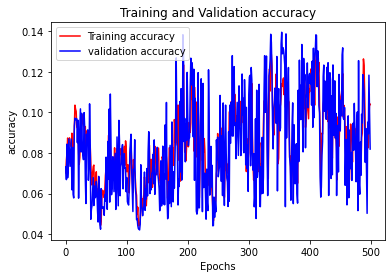

In [30]:
#train & validation accuracy 확인
import matplotlib.pyplot as plt

n_epochs = len(history.history['loss'])
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(0,n_epochs)
plt.plot(epochs, loss_train, 'r', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy') ## <=loss아니고, accuracy임^^
plt.legend()
plt.show()

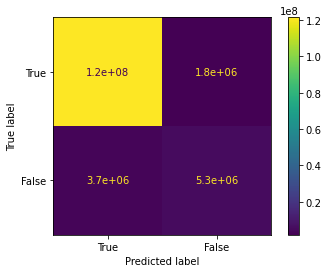

In [31]:
# confusion matrix
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(ab_X, ab_y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['True', 'False'])
cm_display.plot()
plt.show()

In [32]:
#각 스코어 확인
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
print('Acc Score: ',accuracy_score(ab_X,ab_y_pred))
print('Recall Score: ',recall_score(ab_X,ab_y_pred))
print('Pre Score: ',precision_score(ab_X,ab_y_pred))
print('F1 Score: ',f1_score(ab_X,ab_y_pred))

Acc Score:  0.9582360649800067
Recall Score:  0.5885550847386837
Pre Score:  0.7426280123444993
F1 Score:  0.6566752442882392


In [33]:
#아 randomforest 해야했나
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(ab_X, ab_y_pred)
rf.score(ab_X,ab_y_pred)

ValueError: Expected 2D array, got 1D array instead:
array=[0. 0. 0. ... 0. 0. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [34]:
# ROC
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(ab_X, ab_y_pred)
roc = pd.DataFrame({
    'FPR(Fall-out)': fpr,
    'TPRate(Recall)': tpr,
    'Threshold': thresholds
})
roc

,FPR(Fall-out),TPRate(Recall),Threshold
0,0.00000,0.000000,2
1,0.01485,0.588555,1
2,1.00000,1.000000,0


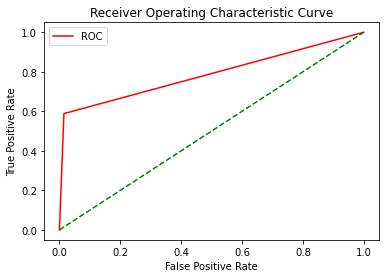

In [35]:
# ROC 커브 확인 커브 된 것 맞음
import matplotlib.pyplot as plt
import seaborn as sns
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()
plot_roc_curve(fpr,tpr)